# PLOTTING NOTEBOOK

A notebook to produce and view simple plots of the data produced during experiments.

N.B.: Make sure this notebook is in the repo root.

## Imports!

In [1]:
from pathlib import Path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Select an experiment subfolder

Use tha variable below to select an experiment to plot.
Type in the name of a subfolder of saves.

In [2]:
experiment_subfolder = "2021_02_16_20_12_41"   # <--- edit this

main_dir = Path("saves") / experiment_subfolder

# Episode returns

Cartesian plots of episode returns, for either training or test episodes

## Reading files

Go around all the "ep*" subfolders, find the episode info files with a given name, for each file compute the average return and insert it into a list as that epoch's return. End when an empty or nonexistent folder is found.

In [3]:
def find_epochs():
    max_epoch=-1
    for fldr in main_dir.iterdir():
        if fldr.is_dir():
            m = re.match(r"^ep([0-9]+)$", fldr.name)
            if m:
                epoch = int(m.group(1))
                max_epoch = max(epoch, max_epoch)
    return max_epoch

def return_from_line(line):
    tokens = line.split('\t')
    # elemento 0 : episode_duration (inutile, sempre costante in HumanoidStandup)
    # elemento 1 : episode_return (utile)
    return float(tokens[1])

def read_returns(fname):
    epochs = find_epochs()
    returns = []
    for epoch in range(epochs):   # esclude l'ultima cartella, ma pazienza, tanto è sempre vuota
        epoch_dir = main_dir / "ep{}".format(epoch)
        if not epoch_dir.exists():
            break
        file_path = epoch_dir / fname
        if not file_path.exists():
            break
        with open(file_path, 'r') as f:
            lines = f.readlines()
        lines.pop(0)   # la prima riga è di intestazione, togliamola
        # recuperiamo i ritorni dalle righe
        this_epoch_returns = list(map(return_from_line, lines))
        # facciamo la media
        this_epoch_avg_return = np.mean(this_epoch_returns)
        # e infine
        returns.append(this_epoch_avg_return)
    return returns

## Plot the returns

With matplotlib.

The "raw" plot will likely be very noisy, so I'll define a smoothed one too.

These plot functions will be quite generic, actually.

In [4]:
def raw_plot(series):
    plt.figure(figsize=(10,5))
    plt.plot(series)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Reward")
    plt.title("Episode Cumulative Rewards")
    plt.show()

def smoothed_plot(series, smoothing_window=5):
    plt.figure(figsize=(10,5))
    # a dispetto del suo nome, "series" il più delle volte sarà una lista
    smoothed_series = pd.Series(series).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(smoothed_series)
    plt.xlabel("Episode")
    plt.ylabel("Smoothed Cumulative Reward")
    plt.title("Episode Cumulative Rewards, smoothed with window size {}".format(smoothing_window))
    plt.show()

## Main

Let's actually do something now.

Use the variable below to select which episodes to plot: train or test

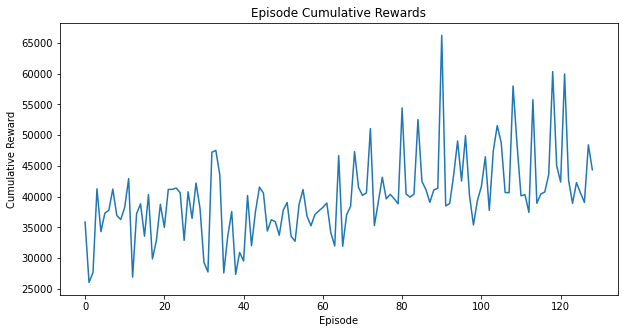

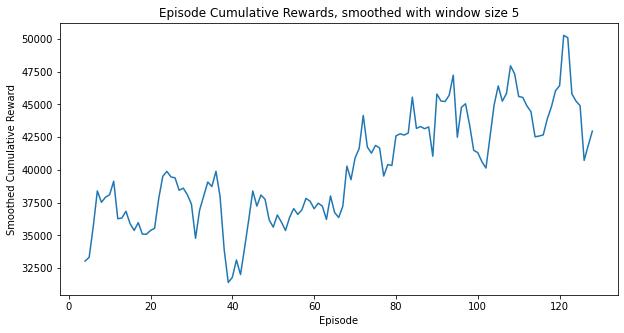

In [10]:
stats_filename = "test_ep_stats.txt"   # <--- CHOOSE "ep_stats.txt" OR "test_ep_stats.txt"

returns = read_returns(stats_filename)

raw_plot(returns)
smoothed_plot(returns, 5)